# **Visualización**
# AE03. Matplotlib BoxPlots

En esta clase vamos a continuar el proceso de graficar utilizando matplotlib, principalmente: 

- El manejo de los diagramas de cajas y bigotes (Boxplots)
- Trabajar con subgráficos 
- Graficar con la orientación a objetos de matplotlib
- Calculo de estadísticas con pandas
- Manejo de anotaciones y uso de los colores con matplotlib

Comenzamos importando las librerías que vamos a utilizar:


In [39]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline 

In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Para hacer las visualizaciones, utilizaremos el set de datos de las flores de Iris.

In [41]:
#iris_path = "/content/drive/MyDrive/Archivos/VD03.csv"
iris_path = "/content/drive/MyDrive/Colab_Python/03. Análisis Exploratorio y Estadística/Archivos/VD03.csv"
iris_df = pd.read_csv(iris_path)
iris_df.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
146,147,6.3,2.5,5.0,1.9,Iris-virginica
18,19,5.7,3.8,1.7,0.3,Iris-setosa
140,141,6.7,3.1,5.6,2.4,Iris-virginica
25,26,5.0,3.0,1.6,0.2,Iris-setosa
144,145,6.7,3.3,5.7,2.5,Iris-virginica


## <font color='blue'>Diagramas de Caja y Bigotes (Box Plots)</font>

El diagrama de Caja y Bigotes es una representación univariada de los datos, utilizando múltiples componentes para poder mostrar la variabilidad y asimetría de los datos. El componente principal corresponde a la caja, compuesta por un rectángulo en el cual los limites corresponden a el primer cuartil y tercer cuartil. Adentro de dicho rectángulo se presenta una línea la cual corresponde a la mediana. El otro componente corresponde a los bigotes, los cuales se extienden hasta una distancia de $1.5 \times IQR$, donde $IQR$ corresponde al rango intercuartil y se calcula: $IQR=Q_3 - Q_1$. Finalmente, cualquier valor que supere la distancia de los bigotes, corresponden a nuestros datos atípicos (outliers), los cuales se marcan como puntos después de los bigotes.

Un "Box plot" es una forma de representar estadísticamente la *distribución* de los datos a través de cinco dimensiones principales:

- **Minimun:** Número más pequeño en el conjunto de datos.
- **First quartile:** Número medio entre el `mínimo` y la` mediana`.
- **Second quartile (Median):** Número medio del conjunto de datos (ordenado).
- **Third quartile:** Número medio entre `mediana` y` máximo`.
- **Maximum:** Número más alto en el conjunto de datos.

<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Images/boxplot_complete.png" width=440, align="center">


Si nosotros quisiésemos graficar manualmente un diagrama de caja y bigote, deberíamos calcular cada elemento mencionado anteriormente para poder dibujarlo en papel y lápiz. Una de las grandes ventajas de utilizar matplotlib, es que cada uno de estos valores los calcula internamente y luego los utiliza para poder graficar cada elemento. Para esto utilizamos el método `plt.boxplot`, donde la sintaxis es la siguiente:

```python
plt.boxplot(x, *args)
```

donde `x` puede ser un arreglo unidimensional, o $n$-dimensional (donde se generarán $n$ cajas). 

Un ejemplo de esto utilizando el set de datos de Iris, obtendremos el Box plot de la variable `SepalLengthCm`:


<font color="green">Otra forma de de ver el boxplot</font>

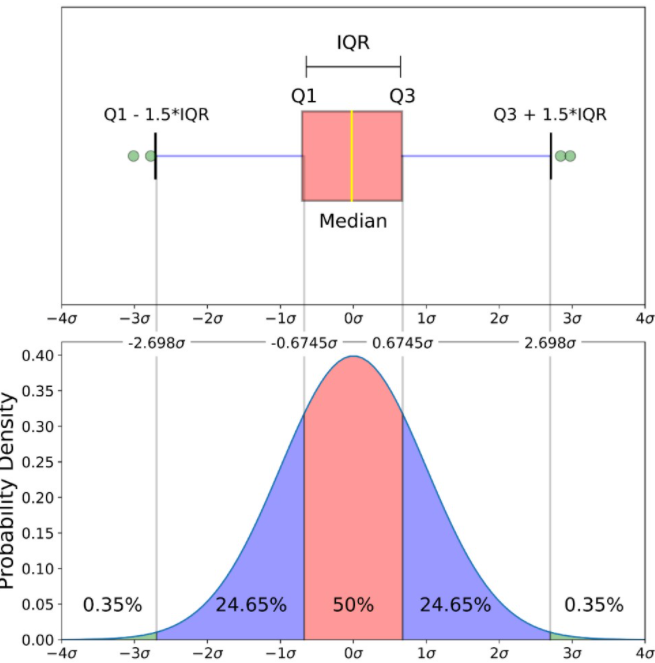

{'boxes': [<matplotlib.lines.Line2D at 0x7f677abcadd0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f677abde510>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f677ab6f550>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f677abdefd0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f677abb8a50>,
  <matplotlib.lines.Line2D at 0x7f677abb8f90>]}

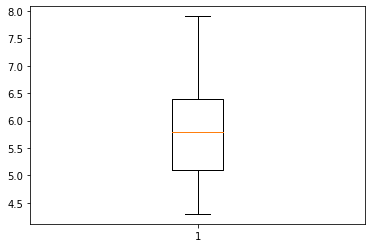

In [42]:
plt.boxplot(iris_df['SepalLengthCm']) #Ojo con el diccionario con los elementos del boxplot

[0.925 1.075 1.075 0.925 0.925] x boxes
[5.1 5.1 6.4 6.4 5.1] y boxes
[4.3 4.3] x caps Inf
[0.9625 1.0375] y caps inf
[7.9 7.9] x caps Sup
[0.9625 1.0375] y caps Sup
[] x outliers
[] y outliers
[0.925 1.075] x median
[5.8 5.8] y median
[1. 1.] x whiskers Inf
[5.1 4.3] y whiskers Inf
[1. 1.] x whiskers Sup
[6.4 7.9] y whiskers Sup


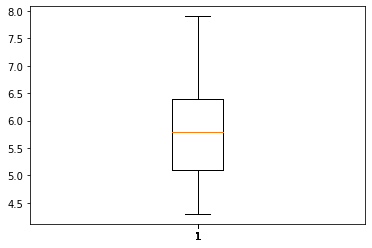

In [50]:
print(plt.boxplot(iris_df['SepalLengthCm'])['boxes'][0].get_xdata(), "x boxes") #cajon con coordenadas del eje x
print(plt.boxplot(iris_df['SepalLengthCm'])['boxes'][0].get_ydata(), "y boxes") #cajon con coordenadas del eje y

print(plt.boxplot(iris_df['SepalLengthCm'])['caps'][0].get_ydata(), "x caps Inf") #limite del bigote inferior en eje x
print(plt.boxplot(iris_df['SepalLengthCm'])['caps'][0].get_xdata(), "y caps inf") #limite del bigote inferior en eje y
print(plt.boxplot(iris_df['SepalLengthCm'])['caps'][1].get_ydata(), "x caps Sup") #limite del bigote superior en eje x
print(plt.boxplot(iris_df['SepalLengthCm'])['caps'][1].get_xdata(), "y caps Sup") #limite del bigote superior en eje y

print(plt.boxplot(iris_df['SepalLengthCm'])['fliers'][0].get_xdata(), "x outliers") #outliers en el eje x
print(plt.boxplot(iris_df['SepalLengthCm'])['fliers'][0].get_ydata(), "y outliers") #outliers en el eje y

print(plt.boxplot(iris_df['SepalLengthCm'])['medians'][0].get_xdata(), "x median") #median plotted on x axis
print(plt.boxplot(iris_df['SepalLengthCm'])['medians'][0].get_ydata(), "y median") #median plotted on y axis

print(plt.boxplot(iris_df['SepalLengthCm'])['whiskers'][0].get_xdata(), "x whiskers Inf") #coordenadas del bigote inferior en el eje x
print(plt.boxplot(iris_df['SepalLengthCm'])['whiskers'][0].get_ydata(), "y whiskers Inf") #coordenadas del bigote inferior en el eje y
print(plt.boxplot(iris_df['SepalLengthCm'])['whiskers'][1].get_xdata(), "x whiskers Sup") #coordenadas del bigote superior en el eje x
print(plt.boxplot(iris_df['SepalLengthCm'])['whiskers'][1].get_ydata(), "y whiskers Sup") #coordenadas del bigote superior en el eje y

A primera vista podemos ver que la mayoría de los elementos están presentes. Un punto importante a notar sobre como grafica `matplotlib` se puede ver en la respuesta a la ejecución del código sin utilizar en la última línea el método `plt.show()`. En este caso, el método de `boxplot` nos retorna un diccionario con todos los objetos artistas para cada elemento pintado (esto es útil si quisiésemos modificar específicamente un artista en específico). 

Otro punto importante es la asimetría presente en los bigotes presentes en el ejemplo anterior. Por defecto `matplotlib` al calcular el rango intecuartil revisa los valores máximos y mínimos presentes en los datos a graficar. Si $(Q_3 + 1.5 IQR) > max(X)$ o $(Q_1 - 1.5 IQR) < min(X)$, lo que realizará matplotlib es cortar los bigotes en los valores máximos y mínimos.
<font color="green">Solo en el caso que no hayan outliers</font>


Viendo los argumentos de boxplot, una de las primeras modificaciones es que podemos agregar la visualización de la media, para esto utilizamos el parámetro `showmeans`, el cual por defecto viene con valor `False`. En este caso, cambiando dicho valor a `True` mostrara la media como un punto dentro de la caja.

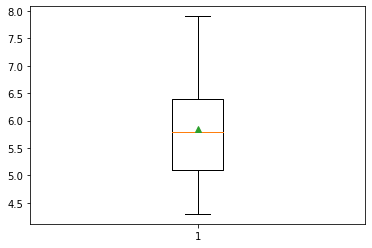

In [44]:
plt.boxplot(iris_df['SepalLengthCm'], showmeans=True) #showmeans muestra la media como punto
plt.show()

Para mantener consistencia con el uso de líneas dentro de nuestro boxplot, podemos utilizar el parámetro `meanline` para especificar el tipo de marcador de línea a utilizar.

A modo de ejemplo, la línea de la media se mostrará en color verde:


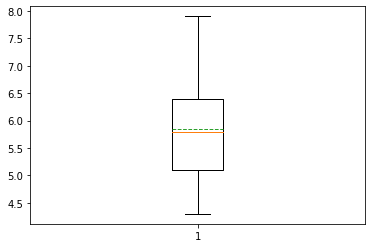

In [45]:
plt.boxplot(iris_df['SepalLengthCm'],showmeans=True, meanline='-') #meanline muestra la media como linea
plt.show()

Utilizando como ejemplo un arreglo bidimensional, graficaremos cada caja y bigote por separado para cada variable. 

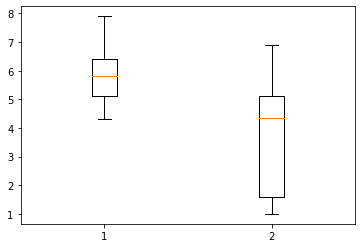

In [46]:
columns_to_plot = [iris_df['SepalLengthCm'],iris_df['PetalLengthCm']] #se agregan dos variables a compartir el figure de boxplot
plt.boxplot(columns_to_plot)

plt.show()

**¿Que pasaría si graficáramos utilizando dos sentencias de boxplot como se muestran a continuación?:**

```python
plt.boxplot(iris_df['SepalLengthCm'])
plt.boxplot(iris_df['PetalLengthCm'])
```


<font color="green">Superpone ambos gráficos</font>

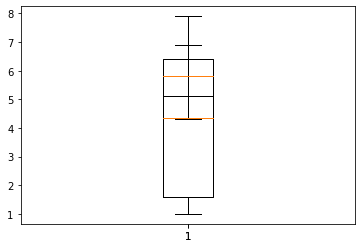

In [47]:
plt.boxplot(iris_df['SepalLengthCm'])
plt.boxplot(iris_df['PetalLengthCm'])
plt.show()